## Lending Club Case Study:
Case Study Overview: You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision: If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

In [1]:
# Importing required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Convert scientific values
pd.options.display.float_format = '{:.2f}'.format 

# Regular Expression import
import re

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read CSV file
loan_CS_1 = pd.read_csv('loan.csv',dtype=object)

In [3]:
#Top two Rows
loan_CS_1.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN


In [4]:
# Print shape
print(loan_CS_1.shape)

(39717, 111)


In [5]:
# Print Information
print(loan_CS_1.info(verbose=True,show_counts=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    id                              object
 1    member_id                       object
 2    loan_amnt                       object
 3    funded_amnt                     object
 4    funded_amnt_inv                 object
 5    term                            object
 6    int_rate                        object
 7    installment                     object
 8    grade                           object
 9    sub_grade                       object
 10   emp_title                       object
 11   emp_length                      object
 12   home_ownership                  object
 13   annual_inc                      object
 14   verification_status             object
 15   issue_d                         object
 16   loan_status                     object
 17   pymnt_plan                   

In [6]:
#Print data type
print(loan_CS_1.dtypes)

id                            object
member_id                     object
loan_amnt                     object
funded_amnt                   object
funded_amnt_inv               object
                               ...  
tax_liens                     object
tot_hi_cred_lim               object
total_bal_ex_mort             object
total_bc_limit                object
total_il_high_credit_limit    object
Length: 111, dtype: object


### Data Cleaning Begin:

In [7]:
# As per our objective of study we need to identify patterns which indicate if a person is likely to
#default. As we are not sure whether any of the current customers will default we need not consider
#them for our analysis.
loan_CS_1 = loan_CS_1[loan_CS_1['loan_status']!='Current']

In [8]:
# Identify duplicate rows in dataset based on id column
print(loan_CS_1.duplicated(subset=None, keep='first').count())
duplicate=loan_CS_1[loan_CS_1.duplicated(['id'])]
duplicate

#Observed no duplicate rows in loan dataset

38577


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


In [9]:
# Identify how many rows have all missing values
print('Number of empty Rows:')
print(loan_CS_1.isnull().all(axis=1).sum())
# Identified: There are no empty rows in whole dataset.

# Identify how many columns have all missing values
print('Number of empty Columns:')
print(loan_CS_1.isnull().all(axis=0).sum())
# Observed: There are 54 columns have all missing values.

Number of empty Rows:
0
Number of empty Columns:
55


In [10]:
#Identify which columns have one or more null values
loan_CS_1.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               38577
total_bal_ex_mort             38577
total_bc_limit                38577
total_il_high_credit_limit    38577
Length: 111, dtype: int64

In [11]:
# Print shape of the dataset
print(loan_CS_1.shape)

(38577, 111)


In [12]:
#Drop the columns where the rows having more than 30% of missing values
loan_CS_1 = loan_CS_1.dropna(thresh=loan_CS_1.shape[0]*0.3,how='all',axis=1)

In [13]:
# Print shape
print(loan_CS_1.shape)

(38577, 55)


In [14]:
pd.Series({col:loan_CS_1[col].unique() for col in loan_CS_1})

id                            [1077501, 1077430, 1077175, 1076863, 1075269, ...
member_id                     [1296599, 1314167, 1313524, 1277178, 1311441, ...
loan_amnt                     [5000, 2500, 2400, 10000, 7000, 3000, 5600, 53...
funded_amnt                   [5000, 2500, 2400, 10000, 7000, 3000, 5600, 53...
funded_amnt_inv               [4975, 2500, 2400, 10000, 5000, 7000, 3000, 56...
term                                                   [ 36 months,  60 months]
int_rate                      [10.65%, 15.27%, 15.96%, 13.49%, 7.90%, 18.64%...
installment                   [162.87, 59.83, 84.33, 339.31, 156.46, 170.08,...
grade                                                     [B, C, A, E, F, D, G]
sub_grade                     [B2, C4, C5, C1, A4, E1, F2, B5, C3, B1, D1, A...
emp_title                     [nan, Ryder, AIR RESOURCES BOARD, Veolia Trans...
emp_length                    [10+ years, < 1 year, 3 years, 8 years, 9 year...
home_ownership                          

In [15]:
#Check the missing values present in column
loan_CS_1.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2386
emp_length                     1033
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12527
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [16]:
#Drop the columns which are not useful in further Analysis.
loan_CS_1 = loan_CS_1.drop(['initial_list_status','pymnt_plan','member_id','policy_code','application_type','url','desc','title','out_prncp','out_prncp_inv','mths_since_last_delinq','tax_liens','collections_12_mths_ex_med','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt'],axis = 1)

In [17]:
# Print shape
print(loan_CS_1.shape)

(38577, 39)


In [18]:
# Print Information
print(loan_CS_1.info(verbose=True,show_counts=False))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 39 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   id                       object
 1   loan_amnt                object
 2   funded_amnt              object
 3   funded_amnt_inv          object
 4   term                     object
 5   int_rate                 object
 6   installment              object
 7   grade                    object
 8   sub_grade                object
 9   emp_title                object
 10  emp_length               object
 11  home_ownership           object
 12  annual_inc               object
 13  verification_status      object
 14  issue_d                  object
 15  loan_status              object
 16  purpose                  object
 17  zip_code                 object
 18  addr_state               object
 19  dti                      object
 20  delinq_2yrs              object
 21  earliest_cr_line         object
 22

In [19]:
#Print data type
print(loan_CS_1.dtypes)

id                         object
loan_amnt                  object
funded_amnt                object
funded_amnt_inv            object
term                       object
int_rate                   object
installment                object
grade                      object
sub_grade                  object
emp_title                  object
emp_length                 object
home_ownership             object
annual_inc                 object
verification_status        object
issue_d                    object
loan_status                object
purpose                    object
zip_code                   object
addr_state                 object
dti                        object
delinq_2yrs                object
earliest_cr_line           object
inq_last_6mths             object
open_acc                   object
pub_rec                    object
revol_bal                  object
revol_util                 object
total_acc                  object
total_pymnt                object
total_pymnt_in

In [20]:
#Check the missing values present in column
loan_CS_1.isnull().sum()

id                            0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                  2386
emp_length                 1033
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_re

In [21]:
#Check the most common value in the Employee length column
loan_CS_1['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [22]:
#Assumption: People with employment length less than 1 year have chances of defaulting due to reason
#like they are fired within Probation Period or spend too much due to first job
loan_CS_1.emp_length.fillna('0',inplace=True)

In [23]:
loan_CS_1['emp_length']=loan_CS_1.emp_length.str.extract('(\d+)')
loan_CS_1.head(2)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,5000,4975,36 months,10.65%,162.87,B,B2,NaN,...,5833.84,5000,863.16,0,0,0,Jan-15,171.62,May-16,0
1,1077430,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,...,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,Sep-13,0


In [24]:
print(loan_CS_1['emp_length'].unique())

['10' '1' '3' '8' '9' '4' '5' '6' '2' '7' '0']


In [25]:
#Check the most common value in the Employee title column
loan_CS_1['emp_title'].value_counts()

US Army                              131
Bank of America                      107
IBM                                   65
AT&T                                  57
Kaiser Permanente                     56
                                    ... 
Intellitrex                            1
FASHION INSTITUTE OF DESIGN            1
Banfield The Pet Hospital              1
Correction Corporation of America      1
VISALIA CYCLERY                        1
Name: emp_title, Length: 28027, dtype: int64

In [26]:
#Fill up the nulls in the Employee title column with the mode
loan_CS_1['emp_title'] = loan_CS_1['emp_title'].fillna(loan_CS_1['emp_title'].mode()[0])

In [27]:
#Check the most common value in the Public Record Bankruptcies column
loan_CS_1['pub_rec_bankruptcies'].value_counts()

0    36238
1     1637
2        5
Name: pub_rec_bankruptcies, dtype: int64

In [28]:
#Fill up the nulls in the Public Record Bankruptcies column with the mode of zero value
loan_CS_1['pub_rec_bankruptcies'] = loan_CS_1['pub_rec_bankruptcies'].fillna(loan_CS_1['pub_rec_bankruptcies'].mode()[0])

In [29]:
# Remove % symbol from interest rate column,it will be used for calculations
loan_CS_1['int_rate'] = loan_CS_1['int_rate'].str.rstrip('%')

# Remove % symbol from revol_util column,it will be used for calculation
loan_CS_1['revol_util'] = loan_CS_1['revol_util'].str.rstrip('%')
loan_CS_1.head(2)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,5000,4975,36 months,10.65,162.87,B,B2,US Army,...,5833.84,5000,863.16,0,0,0,Jan-15,171.62,May-16,0
1,1077430,2500,2500,2500,60 months,15.27,59.83,C,C4,Ryder,...,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,Sep-13,0


In [30]:
#Check the most common value in the Revolve util column
loan_CS_1['revol_util'].value_counts()

0        954
0.20      62
63        62
40.70     57
31.20     57
        ... 
0.01       1
0.83       1
0.16       1
24.63      1
88.48      1
Name: revol_util, Length: 1088, dtype: int64

<AxesSubplot:xlabel='revol_util'>

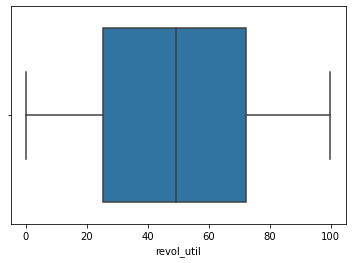

In [31]:
#Fill up the nulls in the Revolve util column with the mode of zero value
loan_CS_1['revol_util'] = pd.to_numeric(loan_CS_1['revol_util'])
sns.boxplot(loan_CS_1.revol_util)

In [32]:
# As there are no outliers in the box plot fill the Null values with Mean for revol_util
loan_CS_1['revol_util'] = loan_CS_1['revol_util'].fillna(loan_CS_1['revol_util'].mean())

In [33]:
#Print data type
print(loan_CS_1.dtypes)

id                          object
loan_amnt                   object
funded_amnt                 object
funded_amnt_inv             object
term                        object
int_rate                    object
installment                 object
grade                       object
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                  object
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
zip_code                    object
addr_state                  object
dti                         object
delinq_2yrs                 object
earliest_cr_line            object
inq_last_6mths              object
open_acc                    object
pub_rec                     object
revol_bal                   object
revol_util                 float64
total_acc                   object
total_pymnt         

In [34]:
# convert amount columns into numeric data to find important correlation.
cols1 = ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','emp_length','annual_inc','dti','total_pymnt']
loan_CS_1[cols1] = loan_CS_1[cols1].apply(pd.to_numeric)

In [35]:
# Print shape
print(loan_CS_1.shape)

(38577, 39)


In [36]:
# important variable purpose of loan in total loans issued
(loan_CS_1.purpose.value_counts()*100)/len(loan_CS_1)

#Observations:
#Most of the loans are taken for debt consolidation(46.80%) and Credit card bill payment(13.03%)

debt_consolidation   46.80
credit_card          13.03
other                10.02
home_improvement      7.45
major_purchase        5.57
small_business        4.55
car                   3.89
wedding               2.40
medical               1.77
moving                1.49
vacation              0.97
house                 0.95
educational           0.84
renewable_energy      0.26
Name: purpose, dtype: float64

### Derived Columns for Analysis:

In [37]:
# Derive month and year columns separately
loan_CS_1.issue_d = pd.to_datetime(loan_CS_1.issue_d, format='%b-%y')
loan_CS_1['year']=loan_CS_1['issue_d'].dt.year
loan_CS_1['month']=loan_CS_1['issue_d'].dt.month
loan_CS_1.head(1)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,year,month
0,1077501,5000,5000,4975.00,36 months,10.65,162.87,B,B2,US Army,...,863.16,0,0,0,Jan-15,171.62,May-16,0,2011,12


## Univariate Analysis:

In [38]:
# Basic statistics with .describe() - Quantitative Variables
loan_CS_1['funded_amnt'].describe()

count   38577.00
mean    10784.06
std      7090.31
min       500.00
25%      5200.00
50%      9550.00
75%     15000.00
max     35000.00
Name: funded_amnt, dtype: float64

<AxesSubplot:xlabel='funded_amnt'>

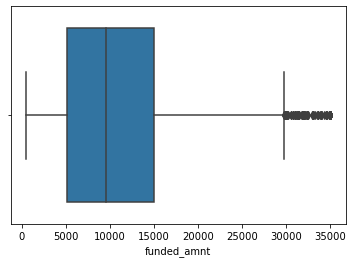

In [39]:
#Univariate analysis using Box Plot on Funded Amount.
sns.boxplot(loan_CS_1.funded_amnt)
#Observation:
#For funded amount interquantile range lies between 5000 to 15000. 

In [40]:
# Describe Total Payment
loan_CS_1.total_pymnt.describe()

count   38577.00
mean    11866.97
std      8809.86
min         0.00
25%      5513.50
50%      9674.05
75%     16136.95
max     58563.68
Name: total_pymnt, dtype: float64

<AxesSubplot:xlabel='total_pymnt'>

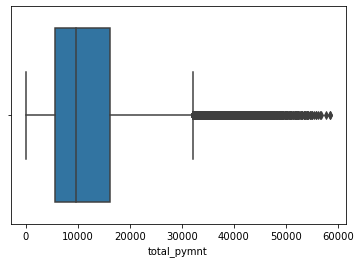

In [41]:
#Univariate analysis using Box Plot on Total Payment.
sns.boxplot(loan_CS_1.total_pymnt)
#Observation
#Most of the total payments approximately for the amount of 10000(Median). However we have a large
#number of outliers for total payment.

In [42]:
# Describe Annual Income
print('Before Removal of Outliers :\n')
print(loan_CS_1['annual_inc'].describe())

# Remove Outliers quantile .95 from Annual Income
# it will be useful to make easy the visualize the plots.

loan_CS_1 = loan_CS_1[loan_CS_1["annual_inc"] < loan_CS_1["annual_inc"].quantile(0.95)]

print('After Removal of Outliers :')
print(loan_CS_1["annual_inc"].describe())

# Now Below data make easy to visuvalize and to find some important correlation

Before Removal of Outliers :

count     38577.00
mean      68777.97
std       64218.68
min        4000.00
25%       40000.00
50%       58868.00
75%       82000.00
max     6000000.00
Name: annual_inc, dtype: float64
After Removal of Outliers :
count    36642.00
mean     60829.83
std      27717.83
min       4000.00
25%      40000.00
50%      56000.00
75%      77704.05
max     140000.00
Name: annual_inc, dtype: float64


<AxesSubplot:xlabel='annual_inc'>

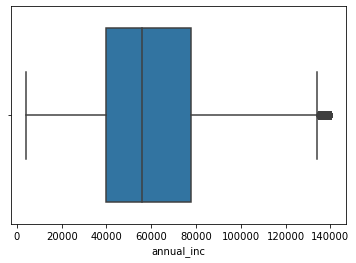

In [43]:
#Univariate analysis using Box Plot on Annual income
sns.boxplot(loan_CS_1.annual_inc)
#Observation:
#Most of the customers who have availed loan have annual income in the range of 40000 to 80000 approx.

In [44]:
#Describe Interest rate
loan_CS_1['int_rate'].describe()


count   36642.00
mean       11.89
std         3.67
min         5.42
25%         8.94
50%        11.71
75%        14.27
max        24.40
Name: int_rate, dtype: float64

<AxesSubplot:xlabel='int_rate'>

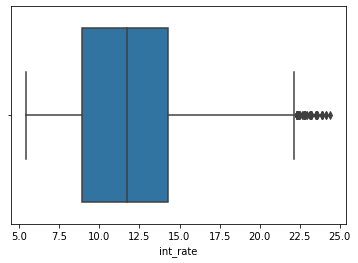

In [45]:
#Univariate analysis using Box Plot on interest rate
sns.boxplot(loan_CS_1.int_rate)
#Observations:
# Average intrest rate is Almost 12 %
#Lending club provides loans to most of the customers in the range of 8.94% to 14.27%

In [46]:
#Describe dti
loan_CS_1['dti'].describe()

count   36642.00
mean       13.45
std         6.66
min         0.00
25%         8.35
50%        13.58
75%        18.72
max        29.99
Name: dti, dtype: float64

<AxesSubplot:xlabel='dti'>

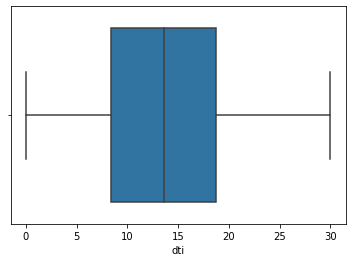

In [47]:
#Univariate analysis using Box Plot on dti
sns.boxplot(loan_CS_1.dti)
#Observations:
# Average dti is Almost 13.5 %. So the customers who have dti around 13.5% are good risk. 

### Correlation Matrix on important variables:

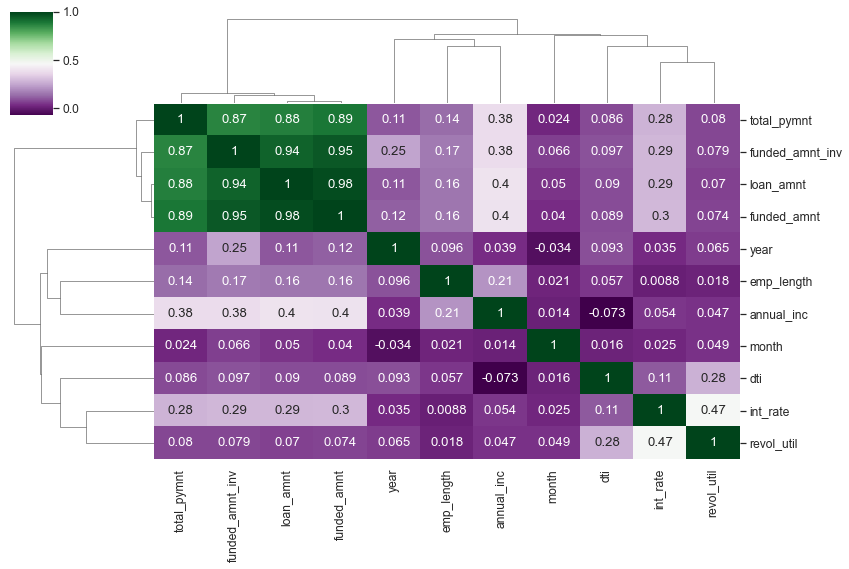

In [48]:
# Heatmap with Dendogram(clustermap) to show closeness among important numerical variables.

loan_CS_1_correlation = loan_CS_1.corr()
sns.set(font_scale=1.1)
sns.clustermap(loan_CS_1_correlation,annot=True,figsize=(12, 8),cmap="PRGn")
plt.show()

#Observations:
# Loan amount-funded amount,loan amount-funded amount investor and funded amount-funded amount investor have positive and strong correlation.
# Annual income with DTI(Debt-to-income ratio) is negatively correlated,however the correlation between them is weak.
# There is a positive correlation between annual income and employment years.
# That means income increases with work experience
# A point to note is that DTI has limited impact on loan amount as per the dataset.
# Annual income and Loan amount are positively correlated.

In [49]:
#Check shape and data
print(loan_CS_1.shape)
loan_CS_1.head(1)

(36642, 41)


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,year,month
0,1077501,5000,5000,4975.00,36 months,10.65,162.87,B,B2,US Army,...,863.16,0,0,0,Jan-15,171.62,May-16,0,2011,12


### Derive Columns for Analysis:

In [50]:
# Derived columns
# Seggregate loan amounts into buckets which will be useful in bivariate analysis.
loan_CS_1['fund_amount_cats'] = pd.cut(loan_CS_1['funded_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

# Seggregate annual incomes into buckets which will be useful in bivariate analysis.
loan_CS_1['annual_income_cats'] = pd.cut(loan_CS_1['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

# Seggregate intrest rates into buckets which will be useful in bivariate analysis.
loan_CS_1['interest_rate_cats'] = pd.cut(loan_CS_1['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16 +'])

# Seggregate dti into buckets which will be useful in bivariate analysis..
loan_CS_1['dti_cat'] = pd.cut(loan_CS_1['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])

# Seggrigate dti into buckets which will be useful in bivariate analysis..
loan_CS_1['revol_util'] = pd.cut(loan_CS_1['revol_util'], [0, 20, 40, 60, 80, 100], labels=['0-20', '20-40', '40-60', '60-80', '80+'])

In [51]:
#Check shape and data
print(loan_CS_1.shape)
loan_CS_1.head(1)
#Observations
#Added four new column whcih can be observed in shape details

(36642, 45)


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,year,month,fund_amount_cats,annual_income_cats,interest_rate_cats,dti_cat
0,1077501,5000,5000,4975.00,36 months,10.65,162.87,B,B2,US Army,...,Jan-15,171.62,May-16,0,2011,12,0-7000,20000-40000,10-13,NaN


In [52]:
#Print data type
print(loan_CS_1.dtypes)

id                                 object
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                          float64
installment                        object
grade                              object
sub_grade                          object
emp_title                          object
emp_length                          int64
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                    datetime64[ns]
loan_status                        object
purpose                            object
zip_code                           object
addr_state                         object
dti                               float64
delinq_2yrs                        object
earliest_cr_line                   object
inq_last_6mths                     object
open_acc                          

Text(0, 0.5, 'Number of Loans')

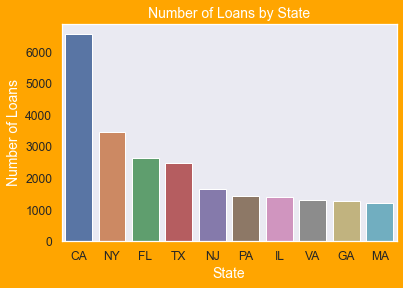

In [53]:
# Univariate analysis using bar plot. Wehave plotted bar plot for top 10 states by loan application
plt.figure(facecolor='orange')
sns.set_style("dark")
ax = sns.countplot(data=loan_CS_1, x="addr_state", order=loan_CS_1.addr_state.value_counts().iloc[:10].index)
ax.set_title('Number of Loans by State',fontsize=14,color='white')
ax.set_xlabel('State',fontsize=14,color='w')
ax.set_ylabel('Number of Loans',fontsize=14,color='w')
#Observations:
# The number of applications from CA is almost double than NY
# From NJ onwards the number of applications are almost similar

Text(0, 0.5, 'Number of Loans')

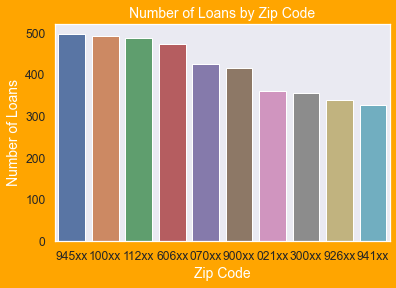

In [54]:
# Univariate analysis using bar plot. Wehave plotted bar plot for top 10 Zip Codes by loan application
plt.figure(facecolor='orange')
sns.set_style("dark")
ax = sns.countplot(data=loan_CS_1, x="zip_code", order=loan_CS_1.zip_code.value_counts().iloc[:10].index)
ax.set_title('Number of Loans by Zip Code',fontsize=14,color='white')
ax.set_xlabel('Zip Code',fontsize=14,color='w')
ax.set_ylabel('Number of Loans',fontsize=14,color='w')
#Observations:
# The number of applications from Zip Code do not provide any pattern

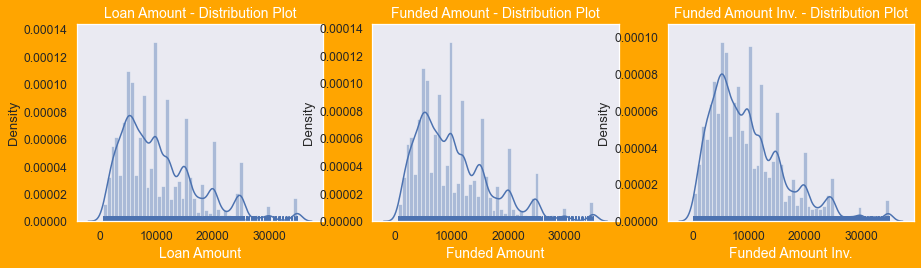

In [55]:
# Univariate analysis using Distribution plot on Loan amount,Funded amount and Funded amount inv.


plt.figure(figsize=(15,8),facecolor='orange')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 3, 1)
ax = sns.distplot(loan_CS_1['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=14,color='white')
ax.set_xlabel('Loan Amount',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 2)
ax = sns.distplot(loan_CS_1['funded_amnt'],rug = True)
ax.set_title('Funded Amount - Distribution Plot',fontsize=14,color='white')
ax.set_xlabel('Funded Amount',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 3)
ax = sns.distplot(loan_CS_1['funded_amnt_inv'],rug = True)
ax.set_title('Funded Amount Inv. - Distribution Plot',fontsize=14,color='white')
ax.set_xlabel('Funded Amount Inv.',fontsize=14,color='w')
plt.show()

# Observation: 
# Distribution of amounts for all three looks close to similar.
# We will work with only funded amount column for further analysis.

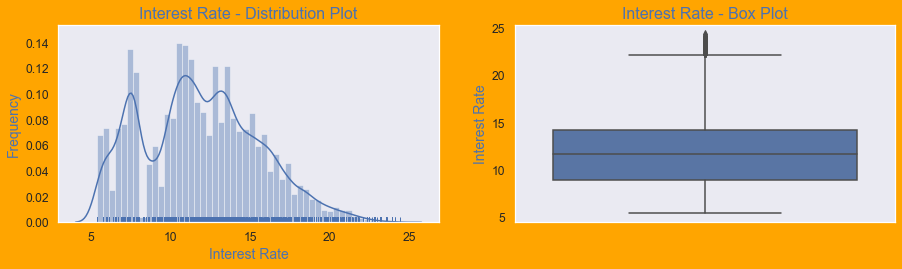

In [56]:
# Univariate Analysis on Interest Rate using distribution plot and Box plot

plt.figure(figsize=(15,8),facecolor='orange')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loan_CS_1['int_rate'],rug = True)
ax.set_title('Interest Rate - Distribution Plot',fontsize=16,color='b')
ax.set_xlabel('Interest Rate',fontsize=14,color='b')
ax.set_ylabel('Frequency',fontsize=14,color='b')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loan_CS_1['int_rate'])
ax.set_title('Interest Rate - Box Plot',fontsize=16,color='b')
ax.set_ylabel('Interest Rate',fontsize=14,color='b')
plt.show()

# Observations :
# Below plots shows Interest Rates on loans are in range of 10% - 15%

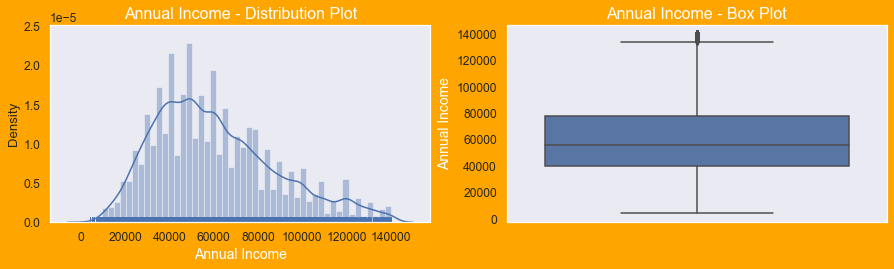

In [57]:
# Univariate Analysis on Annual Income using distribution plot and Box plot

plt.figure(figsize=(15,8),facecolor='orange')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loan_CS_1['annual_inc'],rug = True)
ax.set_title('Annual Income - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Annual Income',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
plt.title('Annual Income - Box Plot')
ax = sns.boxplot(y=loan_CS_1['annual_inc'])
ax.set_title('Annual Income - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Annual Income',fontsize=14,color='w')
plt.show()

# Observations :
# Below plots shows Annual incomes are in range of 40000- 80000

### Segmented Univariate Analysis

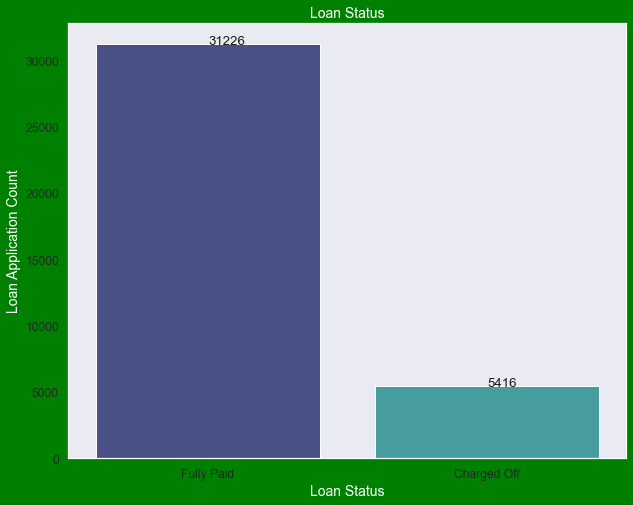

In [58]:
# Univariate Analysis - Unordered Categorical Variables - Loan Status
plt.figure(figsize=(10,8),facecolor='green')
sns.set_style("dark")
ax = sns.countplot(x="loan_status",data=loan_CS_1,palette='mako')
ax.set_title('Loan Status',fontsize=14,color='w')
ax.set_xlabel('Loan Status',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')            
# To show count of values above bars
s=loan_CS_1['loan_status'].value_counts()
for i, v in s.reset_index().iterrows():
    ax.text(i, v.loan_status + 0.3 , v.loan_status, color='k')

# Observations :
# Below plot shows that most of the customers have paid off the loan. 
# So the company might be profitable in business.
# Close to 15% loans have been charged off out of total loan issued.

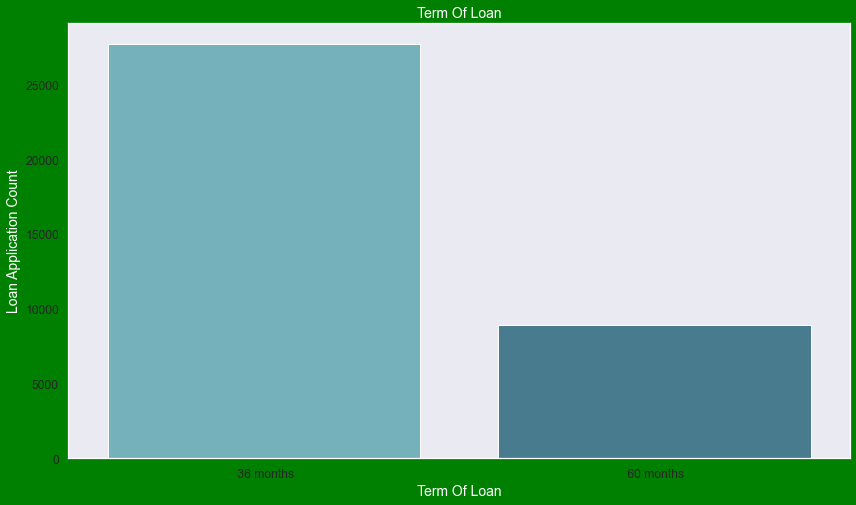

In [59]:
# Univariate Analysis - Unordered Categorical Variables - Term of Loan

plt.figure(figsize=(14,8),facecolor='green')
sns.set_style("dark")
ax = sns.countplot(x="term",data=loan_CS_1,palette='GnBu_d')
ax.set_title('Term Of Loan',fontsize=14,color='w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')
ax.set_xlabel('Term Of Loan',fontsize=14,color = 'w')      
plt.show()
# Observations
# Most of the loans approved by the company are for the period of 3 years

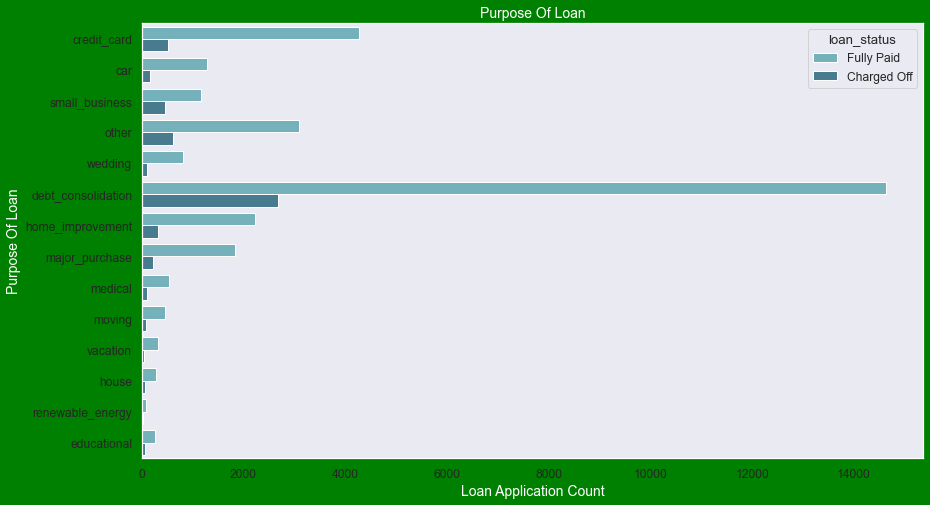

In [60]:
# Univariate Analysis - Unordered Categorical Variables - Purpose Of Loan
plt.figure(figsize=(14,8),facecolor='green')
sns.set_style("dark")
ax = sns.countplot(y="purpose",data=loan_CS_1,hue='loan_status',palette='GnBu_d')
ax.set_title('Purpose Of Loan',fontsize=14,color='w')
ax.set_ylabel('Purpose Of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

# Observations :
# Below plot shows loans were mostly taken for the purpose of debt consolidation and paying credit card bill.
# The number of person who had taken loan for debt consolidation have paid off.
# However the highest number of defaulters are also in same category. 



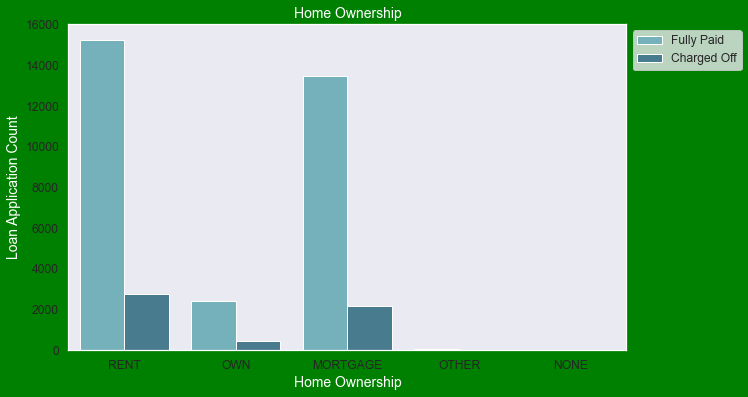

In [61]:
# Univariate Analysis - Unordered Categorical Variables - Home Ownership

plt.figure(figsize=(10,6),facecolor='green')
ax = sns.countplot(x="home_ownership",data=loan_CS_1,hue='loan_status',palette='GnBu_d')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Home Ownership',fontsize=14,color='w')
ax.set_xlabel('Home Ownership',
              fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

# Observations :
# Below plot shows that most of them living in rented home or mortgaged their home.
# Applicant numbers are high from these categories so charged off also high. However percentage of
# chargeoff is low.

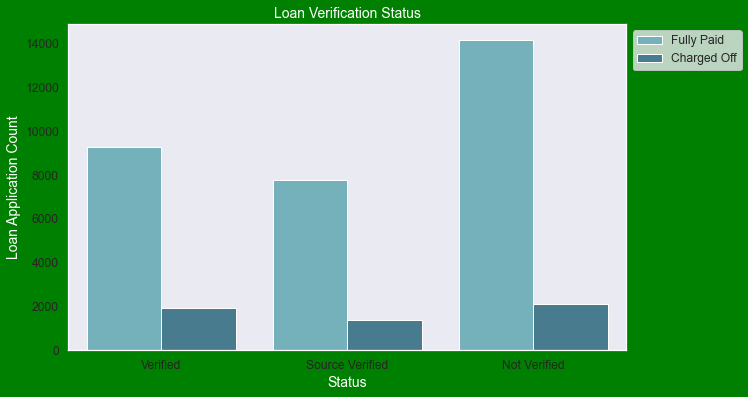

In [62]:
# Univariate Analysis - Unordered Categorical Variables - Verification Status
plt.figure(figsize=(10,6),facecolor='green')
ax = sns.countplot(x="verification_status",data=loan_CS_1,hue='loan_status',palette='GnBu_d')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Loan Verification Status',fontsize=14,color='w')
ax.set_xlabel('Status',
              fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

#Observations:
#The company is distributing maximum number of loans without verification.
#This may mean the largest charged off is due to improper verification. We can verify this in the next plot.

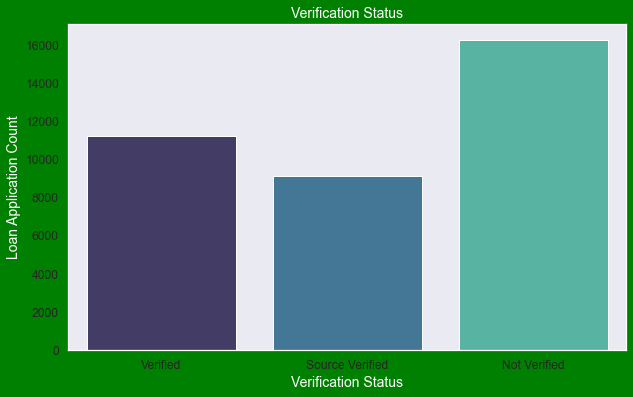

In [63]:
# Univariate Analysis - Unordered Categorical Variables - Verification Status

plt.figure(figsize=(10,6),facecolor='green')
ax = sns.countplot(x="verification_status",data=loan_CS_1,palette='mako')
ax.set_title('Verification Status',fontsize=14,color='w')
ax.set_xlabel('Verification Status',
              fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w') 
plt.show()

#Observations:
#The maximum number of customers who are not verified have paid off the loans.
#It seems that verification has no impact on charged off as we can see the number is similar to verified customers.


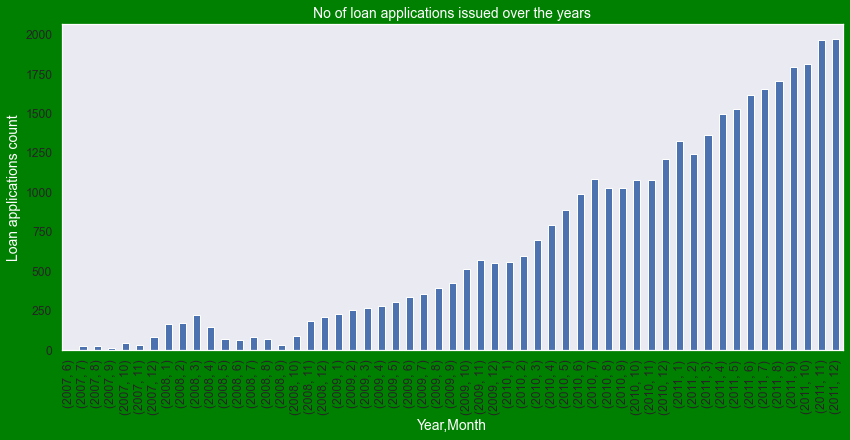

In [64]:
# Derived Column - Ordered Categorical Variables
# Let us look into number of loans which were considered every year,month
# Lets use derived column year to check pattern of loan issuing over the years.
plt.figure(figsize=(14,6),facecolor='green')
loan_CS_1.groupby(['year','month']).id.count().plot(kind='bar')
plt.ylabel('Loan applications count',fontsize=14,color='w')
plt.xlabel('Year,Month',fontsize=14,color = 'w')      
plt.title("No of loan applications issued over the years",fontsize=14,color='w')
plt.show()


# Observation
#The count of loan application is increasing every year from 2009 onwards.
#Increase in number of loan applications is an indicator of the change in behaviour of people 
#towards loan.
#It is also an indicator of boom in the economy.
#Increase in loan application also means the number of charge off will also increase.

## Bivariate Analysis_1:

In [65]:
# Bivariate Analysis on annual income against Chargedoff_Proportion -

incr_range_vs_loan = loan_CS_1.groupby(['annual_income_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
incr_range_vs_loan['Total'] = incr_range_vs_loan['Charged Off'] + incr_range_vs_loan['Fully Paid'] 
incr_range_vs_loan['Chargedoff_Proportion'] = incr_range_vs_loan['Charged Off'] / incr_range_vs_loan['Total']
incr_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# Income range 80000+  has less chances of charged off.
# Income range 0-20000 has high chances of charged off.
# Increase in annual income charged off proportion got decreased. 

loan_status,annual_income_cats,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,0-20000,237,943,1180,0.20
1,20000-40000,1514,7004,8518,0.18
2,40000-60000,1729,9534,11263,0.15
3,60000-80000,1024,6597,7621,0.13
4,80000 +,912,7148,8060,0.11


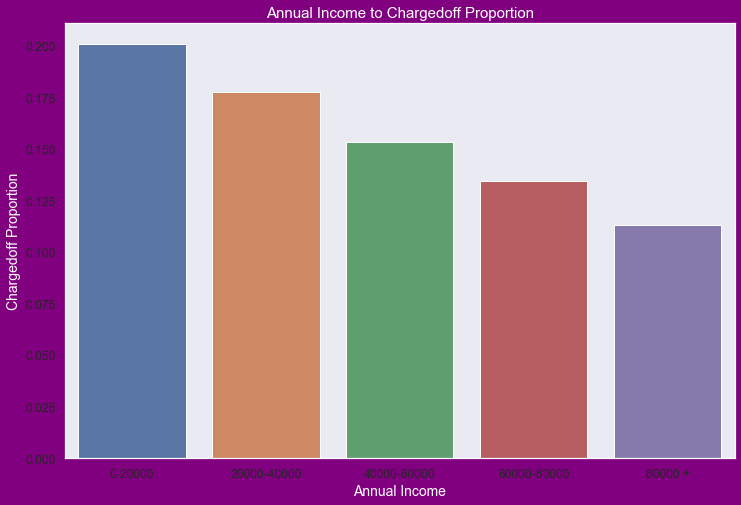

In [66]:
#Bar plots on above data.

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='purple')
ax1.set_title('Annual Income to Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(x='annual_income_cats', y='Chargedoff_Proportion', data=incr_range_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Annual Income',fontsize=14,color='w')
plt.show()

# Observations:
# Income range 80000+  has less chances of charged off.
# Income range 0-20000 has high chances of charged off.
# Notice that with increase in annual income charged off proportion got decreased. 

In [67]:
# Bivariate Analysis on purpose of Loan against Chargedoff_Proportion.

purpose_v_loan = loan_CS_1.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_v_loan['Total'] = purpose_v_loan['Charged Off'] + purpose_v_loan['Fully Paid'] 
purpose_v_loan['Chargedoff_Proportion'] = purpose_v_loan['Charged Off'] / purpose_v_loan['Total']
purpose_v_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# small Business applicants have high chnaces of getting charged off.
# renewable_energy where chanrged off proportion is better as compare to other categories.

loan_status,purpose,Charged Off,Fully Paid,Total,Chargedoff_Proportion
11,small_business,454,1169,1623,0.28
10,renewable_energy,18,77,95,0.19
3,educational,54,258,312,0.17
9,other,605,3091,3696,0.16
8,moving,90,460,550,0.16
5,house,55,283,338,0.16
7,medical,104,536,640,0.16
2,debt_consolidation,2675,14626,17301,0.15
12,vacation,52,313,365,0.14
4,home_improvement,322,2233,2555,0.13


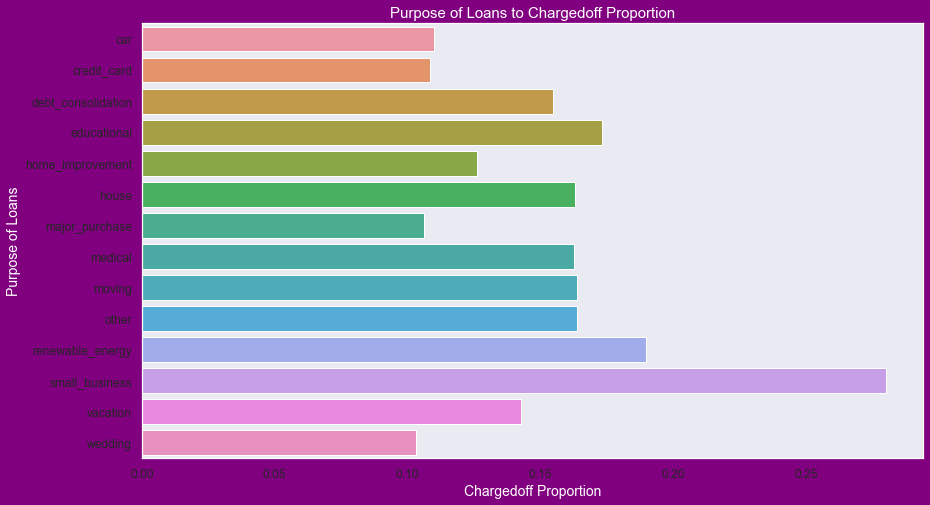

In [68]:
# Bar plots on above.
# pairs of continuous variables.
fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='purple')
ax1.set_title('Purpose of Loans to Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(y='purpose', x='Chargedoff_Proportion', data=purpose_v_loan)
ax1.set_ylabel('Purpose of Loans',fontsize=14,color='w')
ax1.set_xlabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# small Business applicants have high chances of getting charged off.
# renewable_energy also next high chanrged off proportion .

In [69]:
# Bivariate Analysis on interest rate against Chargedoff_Proportion
interest_v_loan = loan_CS_1.groupby(['interest_rate_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_v_loan['Total'] = interest_v_loan['Charged Off'] + interest_v_loan['Fully Paid'] 
interest_v_loan['Chargedoff_Proportion'] = interest_v_loan['Charged Off'] / interest_v_loan['Total']
interest_v_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# interest rate less than 10% has very less chances of charged off. Intrest rates are starting from minimin 5 %.
# interest rate more than 16% has good chnaces of charged off as compared to other category intrest rates.
# Charged off proportion is increasing with higher interest rates.

loan_status,interest_rate_cats,Charged Off,Fully Paid,Total,Chargedoff_Proportion
3,16 +,1191,3129,4320,0.28
2,12.5-16,1951,8974,10925,0.18
1,10-13,1194,7709,8903,0.13
0,0-10,812,11009,11821,0.07


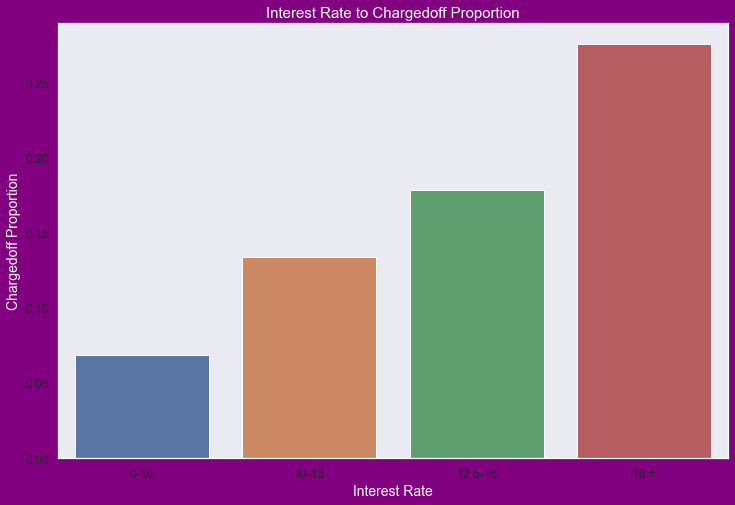

In [70]:
#Bar plots on above data.
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='purple')
ax1.set_title('Interest Rate to Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='interest_rate_cats', y='Chargedoff_Proportion', data=interest_v_loan)
ax1.set_xlabel('Interest Rate',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# Chances of charged off is increasing linearly with interest rate.
# If the interest rate is more than 16% there is a maximum possibility of charged off.

In [71]:
# Bivariate Analysis on revolving util against Chargedoff_Proportion
interest_v_loan = loan_CS_1.groupby(['revol_util', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_v_loan['Total'] = interest_v_loan['Charged Off'] + interest_v_loan['Fully Paid'] 
interest_v_loan['Chargedoff_Proportion'] = interest_v_loan['Charged Off'] / interest_v_loan['Total']
interest_v_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,revol_util,Charged Off,Fully Paid,Total,Chargedoff_Proportion
4,80+,1268,4993,6261,0.20
3,60-80,1305,6288,7593,0.17
2,40-60,1200,6872,8072,0.15
1,20-40,899,6489,7388,0.12
0,0-20,606,5837,6443,0.09


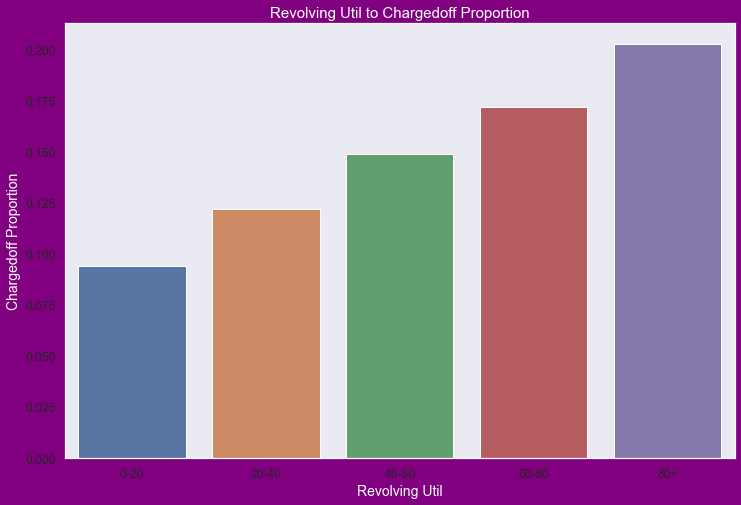

In [72]:
#Bar plots on above data.
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='purple')
ax1.set_title('Revolving Util to Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='revol_util', y='Chargedoff_Proportion', data=interest_v_loan)
ax1.set_xlabel('Revolving Util',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# Chances of charged off is increasing linearly with revolving line utilization rate.
# If the revolving utilization rate is more than 80% there is a maximum possibility of charged off.

In [73]:
# Bivariate Analysis on employment length against Chargedoff_Proportion

emplen_v_loan = loan_CS_1.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emplen_v_loan['Total'] = emplen_v_loan['Charged Off'] + emplen_v_loan['Fully Paid'] 
emplen_v_loan['Chargedoff_Proportion'] = emplen_v_loan['Charged Off'] / emplen_v_loan['Total']
emplen_v_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# Who are not working or less than 1 year of work experience have high chances of getting charged off.
# Rest of the applicants have more or less same chnaces of getting charged off.

loan_status,emp_length,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,0,225,789,1014,0.22
10,10,1269,6615,7884,0.16
7,7,252,1391,1643,0.15
5,5,441,2603,3044,0.14
8,8,194,1147,1341,0.14
1,1,1066,6304,7370,0.14
6,6,294,1779,2073,0.14
3,3,536,3287,3823,0.14
4,4,443,2754,3197,0.14
2,2,547,3554,4101,0.13


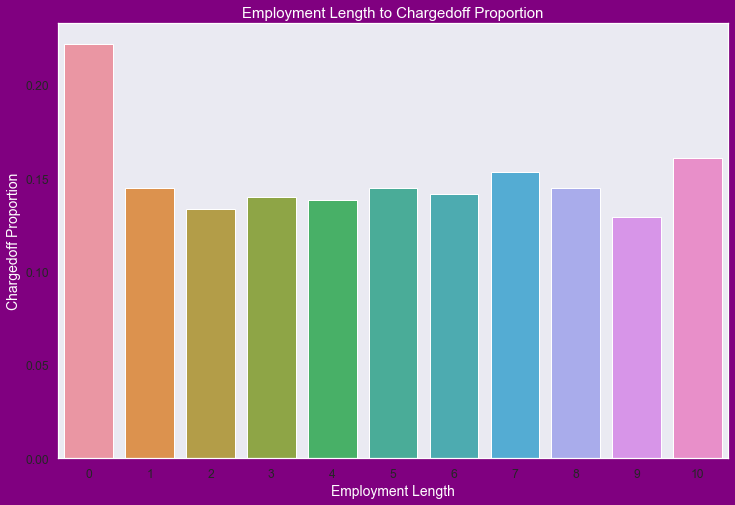

In [74]:
#Bar plots on above data.
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='purple')
ax1.set_title('Employment Length to Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='emp_length', y='Chargedoff_Proportion', data=emplen_v_loan)
ax1.set_xlabel('Employment Length',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# Those who are not working or have less than 1 year of work experience have high chances of getting charged off.
# However for the rest it is approximately similar. So employment length above 1 year has no impact on charged off.

In [75]:
# Bivariate Analysis on pub_rec_bankruptcies against Chargedoff_Proportion

bankruptcies_v_loan = loan_CS_1.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
bankruptcies_v_loan['Total']=bankruptcies_v_loan['Charged Off']+bankruptcies_v_loan['Fully Paid'] 
bankruptcies_v_loan['Chargedoff_Proportion'] = bankruptcies_v_loan['Charged Off'] / bankruptcies_v_loan['Total']
bankruptcies_v_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# Those who already have pub_rec_bankruptcies value 1, have charged off proportion higher than who have no pub_rec_bankruptcies.
# pub_rec_bankruptcies count 2 has even higher charged off proportion but those numbers are not significant to decide.
# Not known is the column for which we don't have any information abount borrower.
# This also makes sense that who has defaulted before has more chances of dafaulting in future as well.

loan_status,pub_rec_bankruptcies,Charged Off,Fully Paid,Total,Chargedoff_Proportion
2,2,2,3,5,0.40
1,1,361,1238,1599,0.23
0,0,5053,29985,35038,0.14


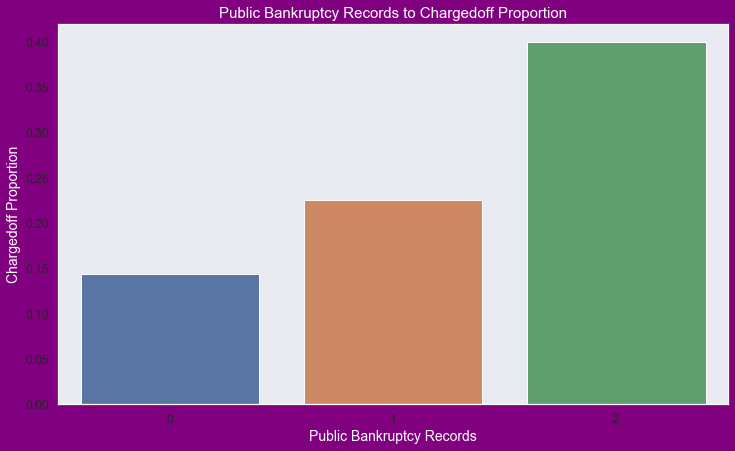

In [76]:
#Bar plots on above data.
fig, ax1 = plt.subplots(figsize=(12, 7),facecolor='purple')
ax1.set_title('Public Bankruptcy Records to Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='pub_rec_bankruptcies', y='Chargedoff_Proportion', data=bankruptcies_v_loan)
ax1.set_xlabel('Public Bankruptcy Records',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# pub_rec_bankruptcies count 2 has higher charged off proportion but those numbers are not significant to decide.
# People who have defaulted before are more likely to default in future as well.

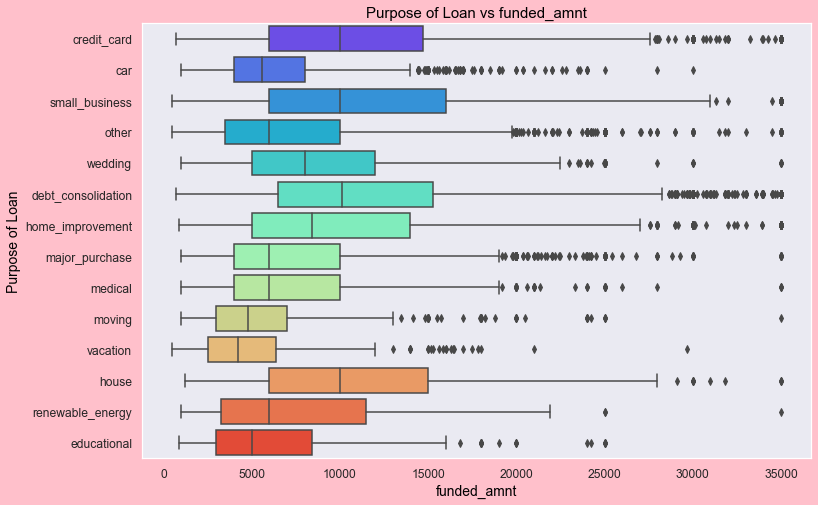

In [77]:
# Bivariate Analysis - Purpose of loan vs Funded amount
# Box Plot

plt.figure(figsize=(12,8),facecolor='pink')
ax = sns.boxplot(y='purpose', x='funded_amnt', data =loan_CS_1,palette='rainbow')
ax.set_title('Purpose of Loan vs funded_amnt',fontsize=15,color='black')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'black')
ax.set_xlabel('funded_amnt',fontsize=14,color = 'black')
plt.show()

# Observations:
# Median,95th percentile,75th percentile of funded amount is highest for loan taken for small business purpose among all purposes.
# Debt consolidation is second and Credit card comes 3rd.

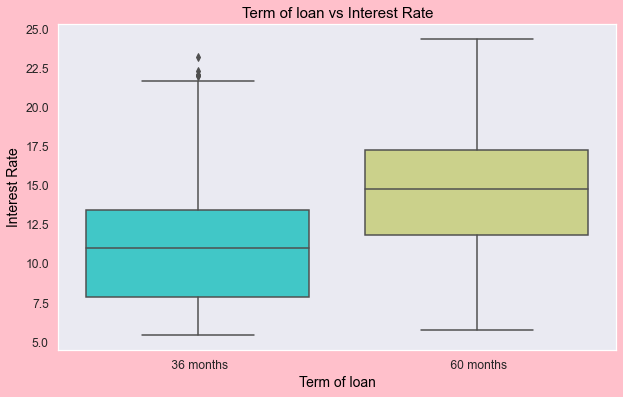

In [78]:
# Bivariate Analysis - Term of loan vs Interest Rate
# Box Plot

plt.figure(figsize=(10,6),facecolor='pink')
ax = sns.boxplot(y='int_rate', x='term', data =loan_CS_1,palette='rainbow')
ax.set_title('Term of loan vs Interest Rate',fontsize=15,color='black')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'black')
ax.set_xlabel('Term of loan',fontsize=14,color = 'black')
plt.show()

# Observations:
# Avearge intrest rate is higher for 60 months loan term.
# loans issued for longer term had higher intrest rates for repayement.

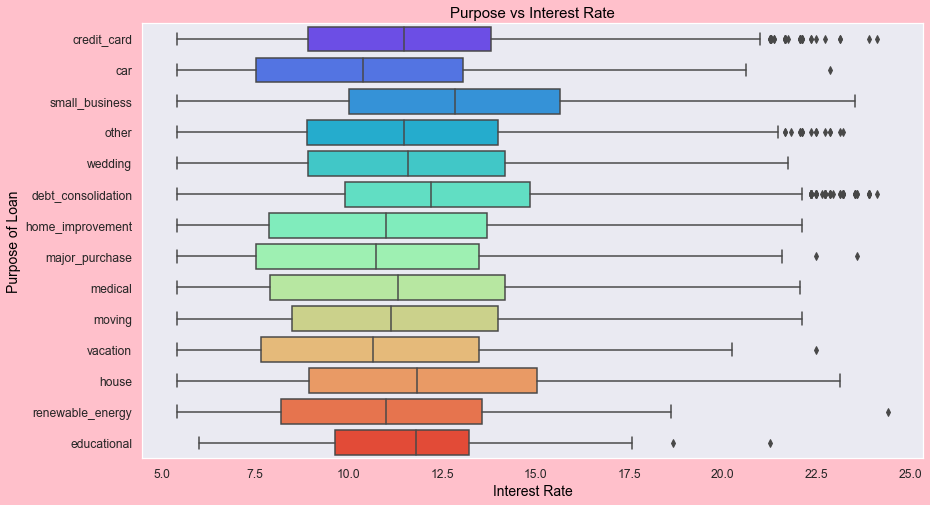

In [79]:
# Bivariate Analysis - Purpose vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8),facecolor='pink')
ax = sns.boxplot(x='int_rate', y='purpose', data =loan_CS_1,palette='rainbow')
ax.set_title('Purpose vs Interest Rate',fontsize=15,color='black')
ax.set_xlabel('Interest Rate',fontsize=14,color = 'black')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'black')
plt.show()

# Observations:
# Avearge intrest rate is highest for small business purpose.
# Debt consolidation is second had to pay more interest rate.

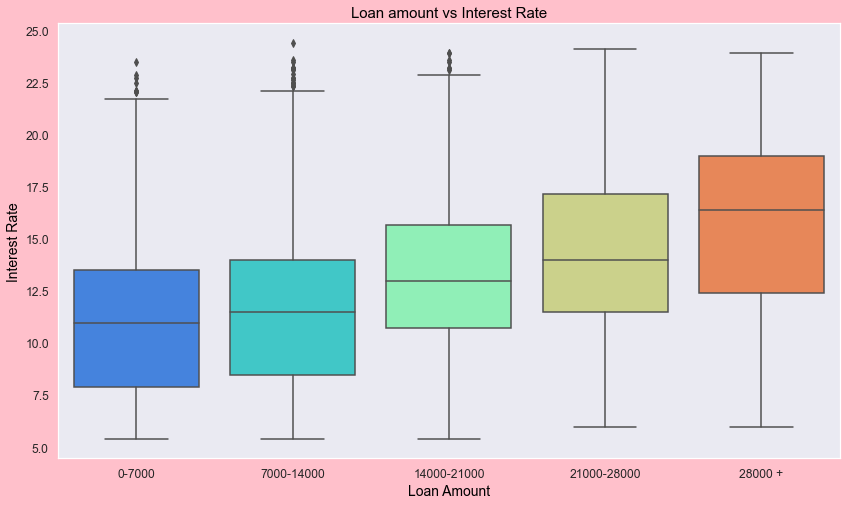

In [80]:
# Bivariate Analysis - Loan Amount vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8),facecolor='pink')
ax = sns.boxplot(y='int_rate', x='fund_amount_cats', data =loan_CS_1,palette='rainbow')
ax.set_title('Loan amount vs Interest Rate',fontsize=15,color='black')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'black')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'black')
plt.show()

# Observations:
# interest rate is increasing with increase in loan amount.

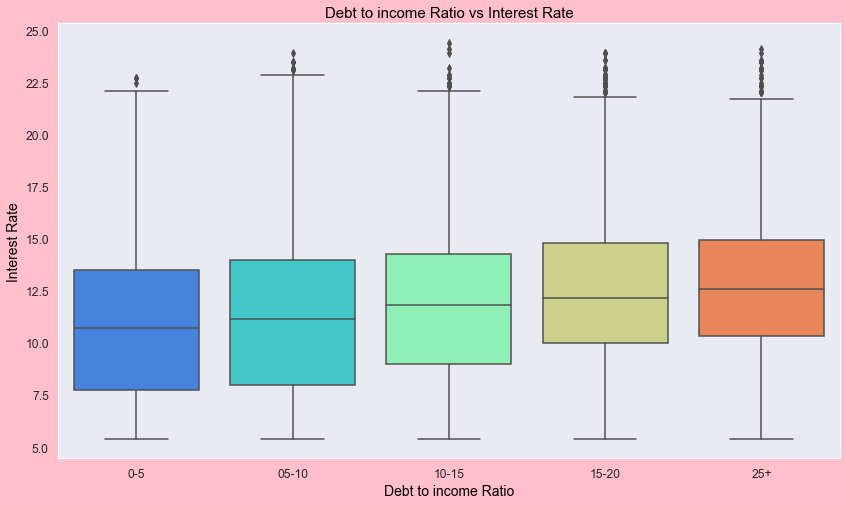

In [81]:
# Bivariate Analysis - dti vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8),facecolor='pink')
ax = sns.boxplot(y='int_rate', x='dti_cat', data =loan_CS_1,palette='rainbow')
ax.set_title('Debt to income Ratio vs Interest Rate',fontsize=15,color='black')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'black')
ax.set_xlabel('Debt to income Ratio',fontsize=14,color = 'black')
plt.show()

# Observations:
# If your DTI is low enough you may get a lower interest rate.
# Plot shows no significant variation but there is slight increase in interest rate with increase in DTI.

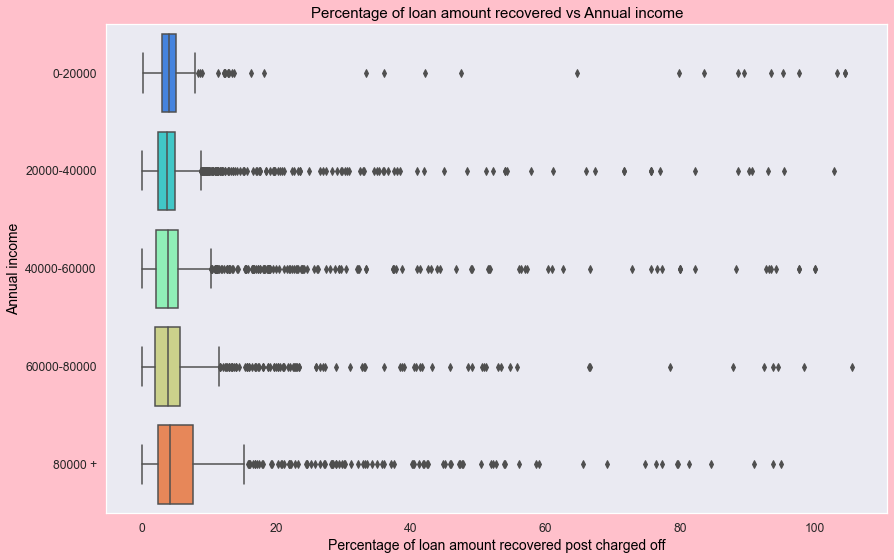

In [82]:
# Bivariate Analysis - Recoveries vs Annual income
# Box Plot
loan_CS_1['recoveries']=pd.to_numeric(loan_CS_1['recoveries'],errors='coerce')
loan_df_rec=loan_CS_1[loan_CS_1['recoveries'] > 0.00]

# calculate recovery percentage 
loan_df_rec['recovery_prcnt']=((loan_df_rec['recoveries']/loan_df_rec['loan_amnt']) * 100) 

# plot
plt.figure(figsize=(14,9),facecolor='pink')
ax=sns.boxplot(x='recovery_prcnt',y='annual_income_cats',data=loan_df_rec,palette='rainbow')
ax.set_title('Percentage of loan amount recovered vs Annual income',fontsize=15,color = 'black')
ax.set_ylabel('Annual income',fontsize=14,color = 'black')
ax.set_xlabel('Percentage of loan amount recovered post charged off',fontsize=14,color = 'black')
plt.show()

# Observations:
# Higher percentage of loan amount is recovered when annual income is high.
# Plot shows no significant variation but there is slight increase in recovery percentage with increase in annual income.

Text(0.5, 0.98, 'Investor Funded Amount vs Loan Amount')

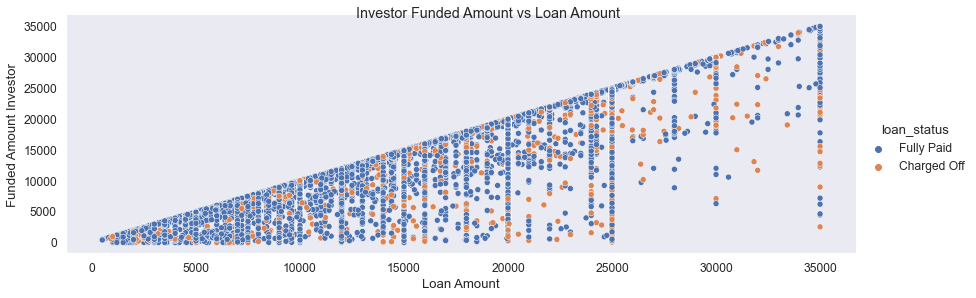

In [83]:
# Funded Amount by Investor vs Loan Amount
ax = sns.relplot(y="funded_amnt_inv", x="loan_amnt", hue = 'loan_status', data=loan_CS_1, 
                 height = 4, aspect = 3, legend='auto')
sns.set(rc={'figure.facecolor':'lightpink'})
ax.set_axis_labels("Loan Amount", "Funded Amount Investor")
ax.fig.suptitle('Investor Funded Amount vs Loan Amount')
#ax.figure(figsize=(15,4))
# Observations:
# There seems to be a linear relationship between Funded amount by Investor and Loan Amount for Fully Paid.
# There seems to be no relationship between Funded amount by Investor and Loan Amount for Charged Off customers.
# There are no values above the linear line. 